In [42]:
#I deleted the other items from this document because they seemed to be messing with the code I was using for the assignment

# Face Recognition

We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures. A fetcher for the dataset is built into Scikit-Learn:

In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60) # It will take several minutes to fetch the dataset. Be patient...
print(faces.target_names) #8 target names
print(faces.images.shape) #1348 images of 62x47 pixels

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Let's plot a few of these faces to see what we're working with:

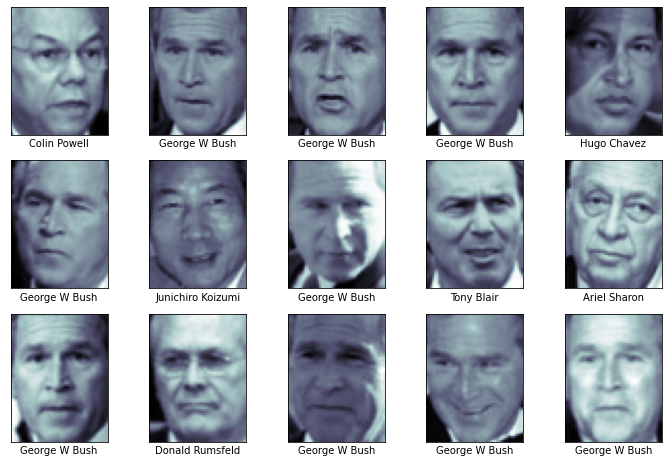

In [4]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Each image contains [62×47] or nearly 3,000 pixels. We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis (Details will be introduced in Machine Learning II of next semester) to extract 150 fundamental components to feed into our support vector machine classifier.

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150, whiten=True, random_state=42)


In [6]:
print(faces.keys())

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])


In [7]:
len(faces.target_names)

8

In [8]:
len(faces.images)

1348

We can do this most straightforwardly by packaging this preprocessor into the pipeline before the `StandardScaler`.

# Assignment (150 points)

In [43]:
#import
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

## Question 1. Set up a new pipeline for face recognition. (30 points)
Hint: add `pca` before the `scaler` and use `RBF` kernel in SVC.

In [10]:
# solution 
#create a pipeline

pipe = Pipeline([
    ("pca", pca), ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf"))])

#why does pca need to be on the same line as the scaler?  this messed with my model for a long time before I changed it

## Question 2. Set up a new hyperparameter grid for RBF kernel.(20 points)
Hint: There are two hyperparameters we need to adjust for RBF kernel: `C` and `gamma`.

In [11]:
# solution
#setup a parameter grid, choose a span of values for C and gamma to be tested

param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10],
    'svc__gamma': [0.001, 0.01, 1, 10],}

## Question 3. Split the data into a training and testing set.(10 points)
Hint: The feature matrix X is saved in `faces.data`, and the label vector y is saved in `faces.target`.

In [12]:
# solution
#split the data into a training and test(valid) set

XTrain, xValid, yTrain, yValid = train_test_split(faces.data, np.ravel(faces.target), 
                test_size = 0.30, random_state = 4)
print(XTrain.shape)
print(xValid.shape)
print(yTrain.shape)
print(yValid.shape)

(943, 2914)
(405, 2914)
(943,)
(405,)


## Question 4. Train the model using GridSearchCV.(30 points)
It may take a while if your grid is dense. Start with a sparse grid.

In [13]:
# solution

#create the model
model = GridSearchCV(pipe, param_grid, cv=5)

#train the model
model.fit(XTrain, yTrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10],
                         'svc__gamma': [0.001, 0.01, 1, 10]})

## Question 5. Print out your best model parameter values and score. (30 points)
Try to get a score higher than 80%.

Hint: The optimal values should fall toward the middle of our grid; if they fell at the edges, we would like to expand the grid to make sure we have found the true optimum.

In [14]:
#solution
#find best parameters and best possible accuracy scores with those parameters
print(model.best_params_)
print(model.best_score_)

{'svc__C': 10, 'svc__gamma': 0.001}
0.8048744793425644


## Question 6. Use the best model to predict the test set and measure the performance of your model.(30 points)
Recall the performance measures we have learned for classifications. You can call `classification_report`([Link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)) in `sklearn.metrics` to get a classification report.

In [45]:
# solution

#predictions for test data
predicted= model.predict(xValid)
print(predicted)

#accuracy of test  #should be approximately the best score from above
print(accuracy_score(yValid,predicted))

#clasification report
report=classification_report(yValid,predicted,target_names=faces.target_names)
print(report)

#confusion matriix
confusion_matrix(yValid,predicted)

[3 2 1 7 3 2 1 1 3 1 2 7 3 3 1 3 3 0 1 3 2 3 7 3 0 3 3 1 3 1 3 1 3 7 5 3 1
 1 1 7 7 3 3 3 7 7 3 4 3 1 4 1 3 3 2 6 1 3 3 3 1 3 1 4 7 1 3 3 3 4 3 1 1 3
 2 3 6 3 0 7 3 5 3 4 7 3 1 3 0 3 3 3 4 3 7 1 3 3 3 3 3 7 3 3 3 3 3 3 7 2 1
 3 3 4 7 6 3 3 7 4 1 3 0 5 3 2 0 1 3 1 0 3 3 7 3 3 3 5 3 3 3 1 3 2 2 3 5 3
 3 3 1 1 7 2 1 7 7 1 4 2 3 7 3 3 3 3 3 6 3 1 1 3 3 3 3 6 3 1 3 1 3 3 0 1 3
 1 1 3 3 1 3 2 1 3 5 1 0 3 1 3 3 5 1 1 2 3 7 4 1 1 5 3 7 1 2 3 3 6 1 3 1 3
 2 7 7 3 6 7 6 3 5 6 6 5 1 6 1 1 4 1 4 0 3 3 3 3 1 2 3 4 3 7 2 3 1 5 3 3 3
 3 3 2 3 1 4 3 2 1 7 6 4 7 3 1 7 3 0 3 7 3 3 3 1 3 1 3 7 1 1 4 1 4 4 7 3 1
 1 3 1 3 3 2 1 3 4 1 1 3 1 3 3 3 1 5 3 3 4 3 1 2 4 7 7 1 0 6 2 3 5 1 3 3 3
 4 4 7 3 2 1 3 3 4 5 1 3 1 3 2 1 7 3 2 3 1 7 4 0 3 3 2 1 3 1 3 1 3 3 2 3 0
 7 0 3 1 2 0 3 3 3 0 3 1 1 2 2 2 3 1 3 3 1 5 1 1 1 3 3 3 3 0 6 1 7 1 2]
0.8345679012345679
                   precision    recall  f1-score   support

     Ariel Sharon       0.89      0.64      0.74        25
     Colin Powell       0.77      0.87  

array([[ 16,   4,   1,   3,   0,   0,   0,   1],
       [  1,  71,   3,   6,   0,   0,   0,   1],
       [  1,   2,  24,   8,   0,   0,   0,   1],
       [  0,   9,   2, 144,   0,   0,   0,   0],
       [  0,   1,   1,   1,  22,   1,   0,   2],
       [  0,   4,   0,   0,   1,  14,   0,   2],
       [  0,   0,   1,   2,   0,   0,  14,   0],
       [  0,   1,   1,   4,   2,   0,   0,  33]])